#   Exchange rate between the euro and the American dollar

The dataset we'll use describes Euro daily exchange rates between 1999 and 2021. The euro (symbolized with €) is the official currency in most of the countries of the European Union.

Daria Chemkaeva put together the data set and made it available on [Kaggle](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020) — the data source is the European Central Bank. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')
exchange_rates

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975


In [2]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

##  Data Cleaning

We do the following:

- We rename the `[US dollar ]` and `Period\Unit:`: columns to something easier to type — US_dollar and Time.
- We change the Time column to a datetime data type.
- We sort the values by Time in ascending order.
- We reset the index (and drop the initial index).

In [3]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar', 'Period\\Unit:': 'Time'}, inplace=True)
exchange_rates['Time']= pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values(by=['Time'], inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

exchange_rates

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5694,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214
5695,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
5696,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
5697,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919


In [4]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']]
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1268     6
          ..
1.2832     1
0.9553     1
0.9228     1
1.2278     1
1.0886     1
Name: US_dollar, Length: 3528, dtype: int64

We can see that there are values in the `US_dollar` column with the character `-` they are probably omitted values, these values are going to be ignored. 

In [5]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']

We wi'll proceed to convert the `US_dollar` column values to float.

In [6]:
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

##  Rolling Mean

If we look at the line's shape, we see many small wiggles — rather than seeing a smooth line. The wiggles, however, have meaning: : they are the visual representation of the daily variation in the exchange rate.

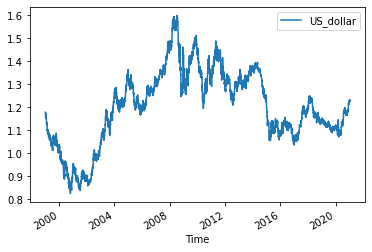

In [7]:
euro_to_dollar.plot('Time', 'US_dollar')
plt.show()

We want to hide it and show only the long-term trends, we'll the rolling mean (also known as the moving average), with rolling window (also know as moving window) of 30.

We'll use [Series.rolling](https://pandas.pydata.org/docs/reference/api/pandas.Series.rolling.html?highlight=rolling#pandas.Series.rolling) function to generate the rolling mean.

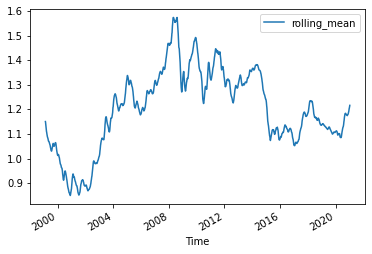

In [8]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar.plot('Time', 'rolling_mean')
plt.show()

 ##  Euro-dollar rate has changed during the coronavirus pandemic

We show how the euro-dollar rate has changed during the coronavirus pandemic. We  show the 2020 data and the 2016-2019 data as a baseline.

In [121]:
euro_to_dollar_after  = euro_to_dollar[euro_to_dollar['Time'].dt.year == 2020]
euro_to_dollar_pandemic = euro_to_dollar[euro_to_dollar['Time'].dt.year == 2020]
euro_to_dollar_period = euro_to_dollar[euro_to_dollar['Time'].dt.year.between(2016, 2020)]


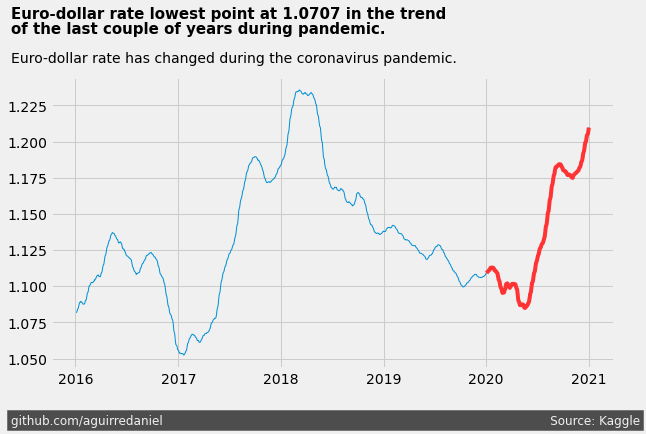

In [165]:
fig, ax = plt.subplots(figsize=(9, 5))
plt.style.use('fivethirtyeight')

# Graphing the 2020 data and 2016-2019 data.
ax.plot(euro_to_dollar_period['Time'], euro_to_dollar_period['rolling_mean'], linewidth=1)
ax.plot(euro_to_dollar_pandemic['Time'], euro_to_dollar_pandemic['rolling_mean'], color='#ff3333')

# Adding title and subtittle.
ax.text(16570, 1.285, 'Euro-dollar rate lowest point at 1.0707 in the trend', size=15, weight='bold')
ax.text(16570, 1.275, 'of the last couple of years during pandemic.', size=15, weight='bold')
ax.text(16570, 1.255, 'Euro-dollar rate has changed during the coronavirus pandemic.')


# Adding a Signature 
ax.text(16570, 1.005,
        'github.com/aguirredaniel' + ' ' * 100 + 'Source: Kaggle',
        color='#f0f0f0', backgroundcolor='#4d4d4d',
        size=12)

plt.show()